In [7]:
# import various useful packages
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
%matplotlib inline

#importing dimensionality reduction packages
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import MDS
from sklearn.manifold import Isomap 
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE

#importing clustering packages
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

#importing plot package
import os
import glob
import pandas as python
import numpy as np
import seaborn as sns

In [8]:


#load data
model =[]
modularity = []
behavior = []

##load random behavioural matrix
for i in [0]:
    for j in range(1,501):
        weights = []
        behave = []
        behave = np.loadtxt('R_15/random/behavior_5.0_15.0_10_{}_{}.dat'.format(i, j), delimiter=' ', dtype=np.float64)
        for k in ["weights1", "weights2", "bias1", "bias2"]:
            data = []
            data = np.loadtxt('R_15/random/{}_5.0_15.0_10_{}_{}.dat'.format(k, i, j), delimiter=' ', dtype=np.float64).reshape(-1)
            if i==0 and k in ["weights1"] and j == 1:
                weights = np.array(data, dtype=np.float64).reshape(-1)
            else:
                weights = np.concatenate([weights, data])
        model.append(weights)
        modularity.append(i-1)
        behavior.append(int(behave))

## load data with cluster

##for i in [0, 1, 2, 3, 4, 7]:
##    for j in range(1,31):
##        weights = []
##        for k in ["weights1", "weights2", "bias1", "bias2"]:
##            data = []
##            data = np.loadtxt('noise_0_1_2_3_4_7/{}_5.0_50.0_10_{}_{}.dat'.format(k, i, j), delimiter=' ', dtype=np.float64).reshape(-1)
##            weights = np.concatenate([weights, data])
##        model.append(weights)
##        modularity.append(i)




In [9]:
#tSNE
import time 
time_start = time.time()
tsne = TSNE(n_components=2,perplexity=80,method='exact') 
tsne_results = tsne.fit_transform(model)

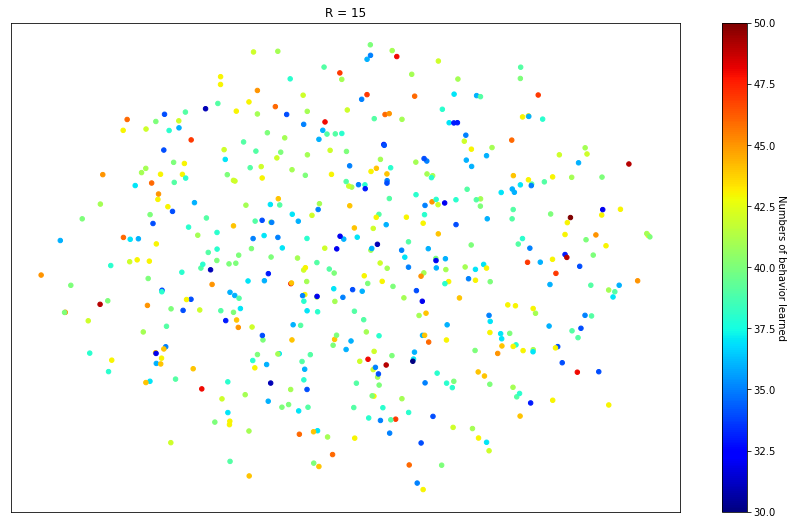

In [27]:
##plot tSNE
##%matplotlib notebook
##import mpld3
##mpld3.enable_notebook()

import matplotlib.pyplot as plt
plt.figure(figsize = (15,9))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s =20 , c = behavior, cmap='jet')
plt.colorbar().set_label('Numbers of behavior learned', rotation=270, labelpad=10)

#plt.colorbar()
#plt.xlabel('tSNE-1') , plt.ylabel('tSNE-2')
#plt.xlim(-10, 10.0)
#plt.ylim(-10, 10)
plt.title('R = 15')
plt.xticks([])
plt.yticks([])
plt.savefig('fixed_15.jpg',dpi=500)
plt.show()


In [1]:
## plot behavioural matrix
import networkx as nx
from matplotlib import pyplot, patches

def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):

    adjacency_matrix = np.genfromtxt(G)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)

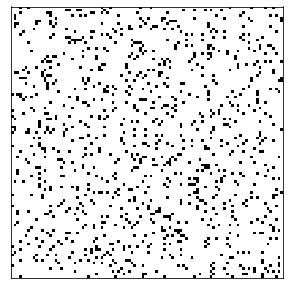

In [26]:
G = 'command.csv'
draw_adjacency_matrix(G)


plt.xticks([])
plt.yticks([])
plt.savefig('command.jpg',dpi=500)
plt.show()